In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
import dedalus.public as d3

import logging
logger = logging.getLogger(__name__)

In [3]:
from frontal_zone import *

## Sensitivity of growth rate $\Im\{\omega\}$ and instability scale $\lambda_{\text{max}}$ to frontal strength $M$

In [4]:
Mc = N*np.sqrt(np.sin(θ))
print(fr"We consider only subcritical fronts, i.e. with M < Mc = {round(Mc,7)}, which are gravitationally stable.")

We consider only subcritical fronts, i.e. with M < Mc = 4.47e-05, which are gravitationally stable.


In [ ]:
Ls = 10. **np.linspace(-5, -2, 100)
growth_rates = {}
for M in [5e-6, 1.e-5, 4.e-5, 4.4e-5, 4.44e-5]:
    growth_rates[M] = np.zeros_like(Ls)
    for i, L in enumerate(Ls):
        ds = bottom_frontal_zone_instability(0., 2*np.pi*L, M)
        growth_rates[M][i] = ds['omega'][ds['idx']].imag

##### Takeaways
- Growth rates increase, and instability scales decrease, with frontal strength. The decrease in instability scales is expected because the bottom frontal zone stratification $B_{z} = N^{2} - M^{2}/\sin{\theta}$ decreases with the frontal strength and thus so does the Rossby deformation radius $L_{d} = N^{2}H/f$.
- Typical instability scales are between 2km and 10km.
- Weak fronts ($ M \ll 4 \times 10^{-5}$ s$^{-1}$) are stable. Is this consistent with critical shear ideas in the classic baroclinic instability problem (e.g. as described in Vallis)?

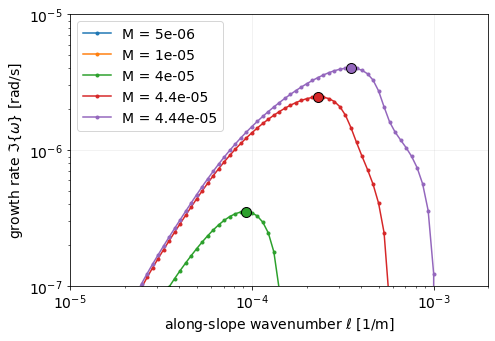

In [339]:
plt.figure(figsize=(7.5,5))
plt.ylim(1e-7, 1e-5)
plt.xlim(1e-5, 2e-3)
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"growth rate $\Im\{\omega\}$ [rad/s]")
plt.xlabel(r"along-slope wavenumber $\ell$ [1/m]")
plt.grid(True, alpha=0.2)
for M,gr in growth_rates.items():
    idx = np.argmax(gr)    
    Λ = M**2/f
    Ri = N**2/Λ**2
    p = plt.plot(Ls, gr, ".-", label=f"M = {M}")
    plt.plot(Ls[idx], gr[idx], "o", markeredgecolor="k", color=p[0].get_c(), markersize=10)
plt.legend();